In [2]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [15]:
model = YOLO("yolov8m-seg.pt")
# image_folder = r"test_cropped_clocks\img_18_cropped.jpg"
image_folder = r"test_cropped_clocks\img_16_cropped.jpg"
results = model.predict(source=image_folder, task='segment', save=False, retina_masks=True)


image 1/1 e:\YOLO\ImgSegment\test_cropped_clocks\img_16_cropped.jpg: 640x576 1 clock, 62.6ms
Speed: 5.0ms preprocess, 62.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 576)


In [16]:
print(type(results))

<class 'list'>


In [17]:
print(type(results[0]))

<class 'ultralytics.engine.results.Results'>


In [18]:
# 打印基本信息
result = results[0]
print(f"图像路径: {result.path}")
print(f"原始图像尺寸: {result.orig_img.shape}")
print(f"检测到的物体数量: {len(result.boxes)}")

图像路径: e:\YOLO\ImgSegment\test_cropped_clocks\img_16_cropped.jpg
原始图像尺寸: (185, 158, 3)
检测到的物体数量: 1


In [19]:
print(type(result.boxes))

<class 'ultralytics.engine.results.Boxes'>


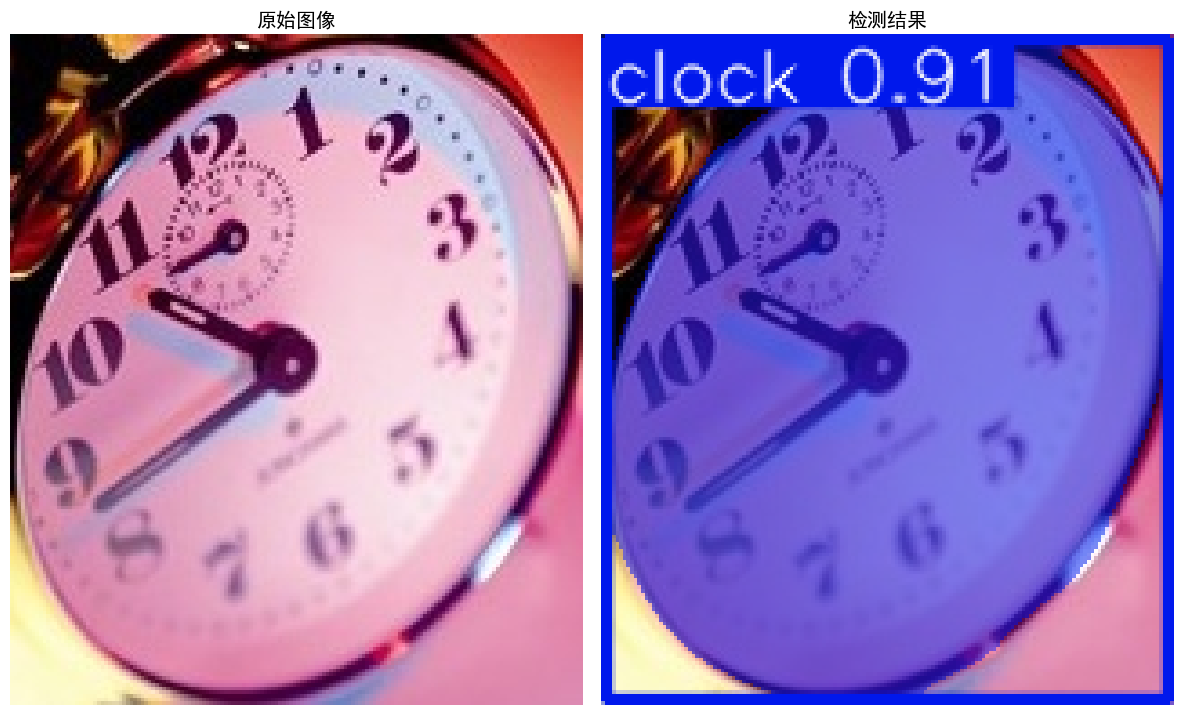

In [20]:
# 设置matplotlib字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

# 可视化结果
plt.figure(figsize=(12, 10))

# 显示原始图像
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB))
plt.title("原始图像")
plt.axis("off")

# 显示带有检测结果的图像
plt.subplot(1, 2, 2)
annotated_img = result.plot()  # 绘制结果（包括边界框和分割掩码）
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title("检测结果")
plt.axis("off")

plt.tight_layout()
plt.show()

In [21]:
# 检查分割掩码信息
try:
    if result.masks is not None:
        print("\n分割掩码信息:")
        print(f"掩码数量: {len(result.masks)}")
        print(f"掩码形状: {result.masks.data.shape}")
except AttributeError:
    print("\n结果不包含分割掩码")


分割掩码信息:
掩码数量: 1
掩码形状: torch.Size([1, 185, 158])


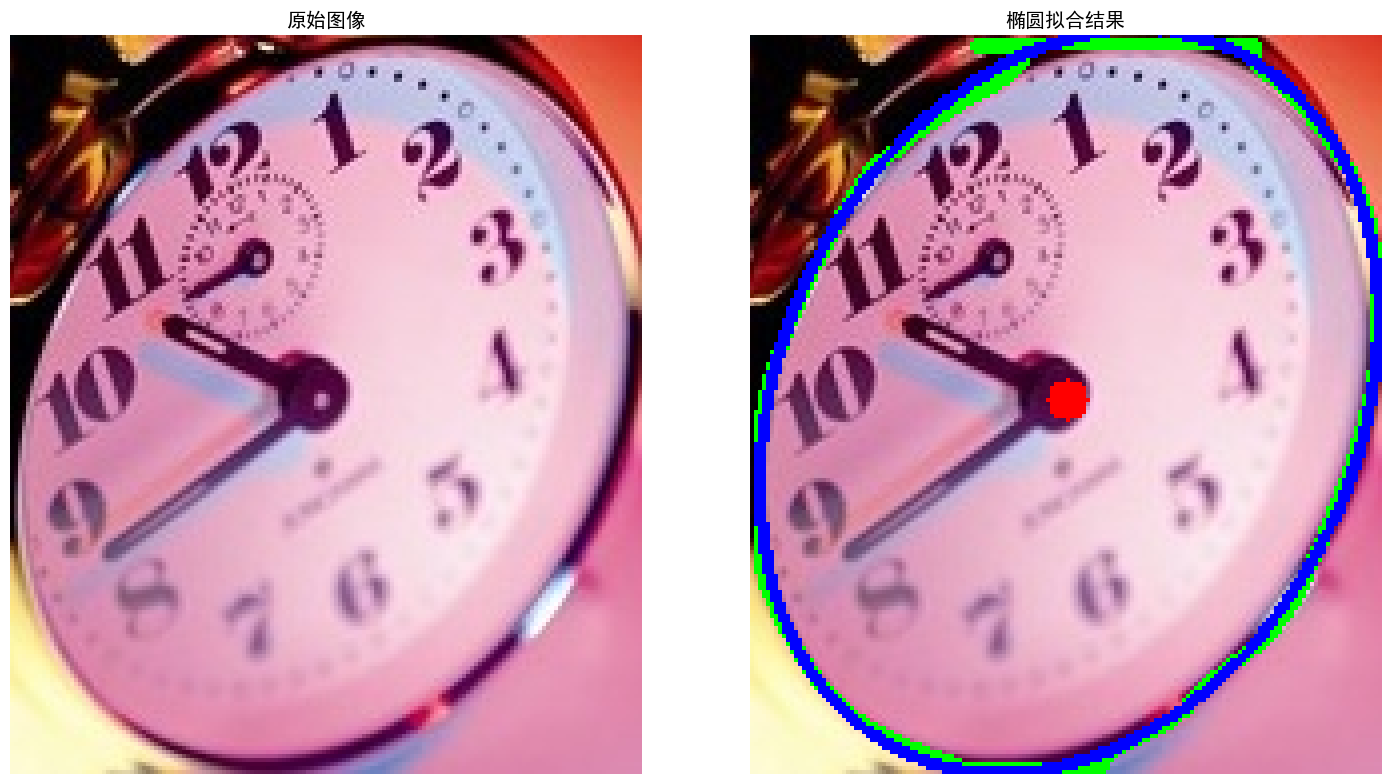


椭圆拟合结果:
椭圆中心: (79, 91)
长轴: 72像素
短轴: 96像素
旋转角度: 24.939224243164062°


In [22]:
import numpy as np
import torch
import cv2

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

# 提取掩码数据并转为numpy数组
if result.masks is not None:
    # 获取掩码数据
    mask = result.masks.data[0]  # 只取第一个掩码
    
    # 将PyTorch张量转换为numpy数组
    if isinstance(mask, torch.Tensor):
        mask = mask.cpu().numpy()
    
    # 将浮点掩码转换为8位二值图像
    mask_binary = (mask * 255).astype(np.uint8)
    
    # 寻找轮廓
    contours, _ = cv2.findContours(mask_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 选择最大的轮廓
    if contours and len(contours[0]) >= 5:  # 需要至少5个点来拟合椭圆
        largest_contour = max(contours, key=cv2.contourArea)
        
        # 拟合椭圆
        ellipse = cv2.fitEllipse(largest_contour)
        (ellipse_center, (axes_length1, axes_length2), angle) = ellipse
        
        # 可视化结果
        plt.figure(figsize=(15, 8))
        
        # 显示原图
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB))
        plt.title("原始图像")
        plt.axis("off")
        
        # 绘制拟合结果
        result_image = result.orig_img.copy()
        
        # 绘制轮廓
        cv2.drawContours(result_image, [largest_contour], 0, (0, 255, 0), 2)
        
        # 绘制椭圆
        cv2.ellipse(result_image, ellipse, (255, 0, 0), 2)
        
        # 绘制椭圆中心
        cv2.circle(result_image, (int(ellipse_center[0]), int(ellipse_center[1])), 5, (0, 0, 255), -1)
        

        
        # 显示拟合结果
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title("椭圆拟合结果")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
        
        # 输出椭圆参数
        print(f"\n椭圆拟合结果:")
        print(f"椭圆中心: ({int(ellipse_center[0])}, {int(ellipse_center[1])})")
        print(f"长轴: {int(axes_length1/2)}像素")
        print(f"短轴: {int(axes_length2/2)}像素")
        print(f"旋转角度: {angle}°")
        
    else:
        print("未找到足够的轮廓点进行椭圆拟合")
else:
    print("结果不包含分割掩码")

In [23]:
print(type(mask))

<class 'numpy.ndarray'>


In [24]:
print(len(mask))
print(mask)

185
[[          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 ...
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]
 [          0           0           0 ...           0           0           0]]


In [25]:
print(mask.shape)

(185, 158)
